## Classification Neural Network

Импортируем библиотеки и "законсервированный" подготовленный датасет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

!pip install Tensorflow. Обновили файл requirements.

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Прописываем структуру нейронной сети. Стоит обратить внимание на то, что в задачах классификации наша сеть идёт не на расширение (как раньше мы делали), а на сужение. Функцию тангенса мы не используем, так как нам не подходит её диапазон. Наиболее оптимальным вариантом является sigmoid. На выходе у нас 1 нейрон.

In [4]:
cnn = Sequential()

cnn.add(Dense(3, activation = 'sigmoid', input_dim = 3))

cnn.add(Dense(2, activation = 'sigmoid'))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
import sys
sys.setrecursionlimit(10000)

Проводим обучение нашей сети. Экспериментальным путём получили, что оптимальный размер партии = 8 , а количество эпох = 17.

In [6]:
history = cnn.fit(X_train, y_train, batch_size = 8, epochs = 17, validation_data=(X_test, y_test))

Epoch 1/17
136/136 [==============================] - 2s 5ms/step - loss: 0.7490 - accuracy: 0.5166 - val_loss: 0.7601 - val_accuracy: 0.4632
Epoch 2/17
136/136 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.5166 - val_loss: 0.7262 - val_accuracy: 0.4632
Epoch 3/17
136/136 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5166 - val_loss: 0.7086 - val_accuracy: 0.4632
Epoch 4/17
136/136 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5166 - val_loss: 0.6984 - val_accuracy: 0.4632
Epoch 5/17
136/136 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5166 - val_loss: 0.6911 - val_accuracy: 0.4632
Epoch 6/17
136/136 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5295 - val_loss: 0.6856 - val_accuracy: 0.5331
Epoch 7/17
136/136 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5692 - val_loss: 0.6814 - val_accuracy: 0.6029
Epoch 

Теперь проанализируем графики ошибок обучения и тестирования. Ошибки сводятся к минимуму к 17 эпохе, при этом сеть остается не переобученной.

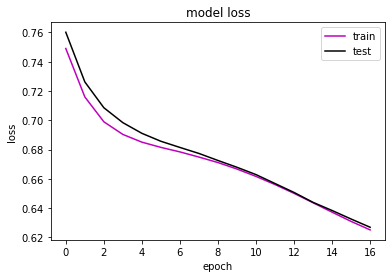

In [7]:
plt.figure()
plt.plot(history.history['loss'],'m')
plt.plot(history.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Выбираем порог отсечения также путём множества экспериментов. И в итоге имеем его равным 0,5.

In [10]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

Проанализируем таблицу сопряжённости. Видим, что сеть 184 объектов распознала верно и 88 нет. Точность модели: 67,6%. Доля ошибок: 32,4%. Это максимально хороший результат, которого мне удалось добиться, экспериментируя с параметрами сети и тд.

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[91 55]
 [33 93]]


## Вывод

Сравнивая логистическую регрессию и НС сети для классификации, делаем вывод, что логистическая регрессия дала немного точнее модель, которая позволила распознать верно 68,1% объектов. Напомню, что мы работали с классификацией по уровню дохода университетов, где были ВУЗы с высоким и низким уровнем дохода. 